<a href="https://colab.research.google.com/github/PanJazdan/OverfittingAnalysis/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [18]:
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7092 - loss: 0.5591 - val_accuracy: 0.7623 - val_loss: 0.4913
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7592 - loss: 0.5014 - val_accuracy: 0.7615 - val_loss: 0.4965
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7730 - loss: 0.4829 - val_accuracy: 0.7692 - val_loss: 0.4901
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7729 - loss: 0.4803 - val_accuracy: 0.7600 - val_loss: 0.4933
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7834 - loss: 0.4567 - val_accuracy: 0.7815 - val_loss: 0.4958
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7752 - loss: 0.4708 - val_accuracy: 0.7762 - val_loss: 0.4642
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7830 - loss: 0.4462 - val_accuracy: 0.7715 - val_loss: 0.4825
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7982 - loss: 0.4219 - val_

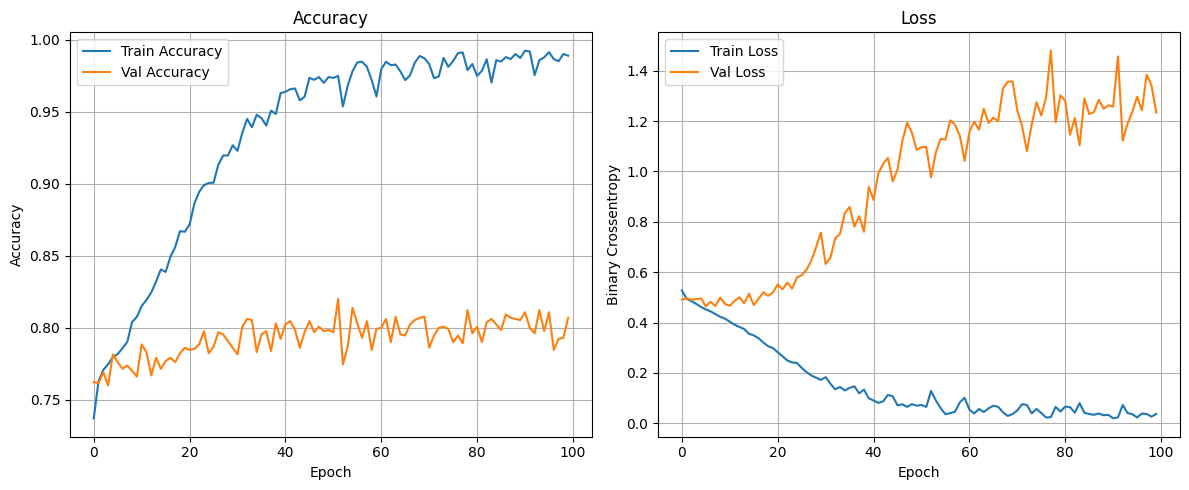

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time
wine = fetch_ucirepo(id=186)
X = wine.data.features
y = wine.data.targets.values.ravel()

y_binary = (y >= 6).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

start = time.time()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


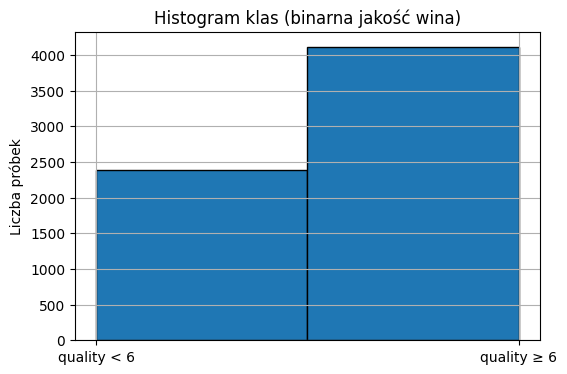

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(y_binary, bins=2, edgecolor='k')
plt.xticks([0, 1], ['quality < 6', 'quality ≥ 6'])
plt.title('Histogram klas (binarna jakość wina)')
plt.ylabel('Liczba próbek')
plt.grid(True)
plt.show()


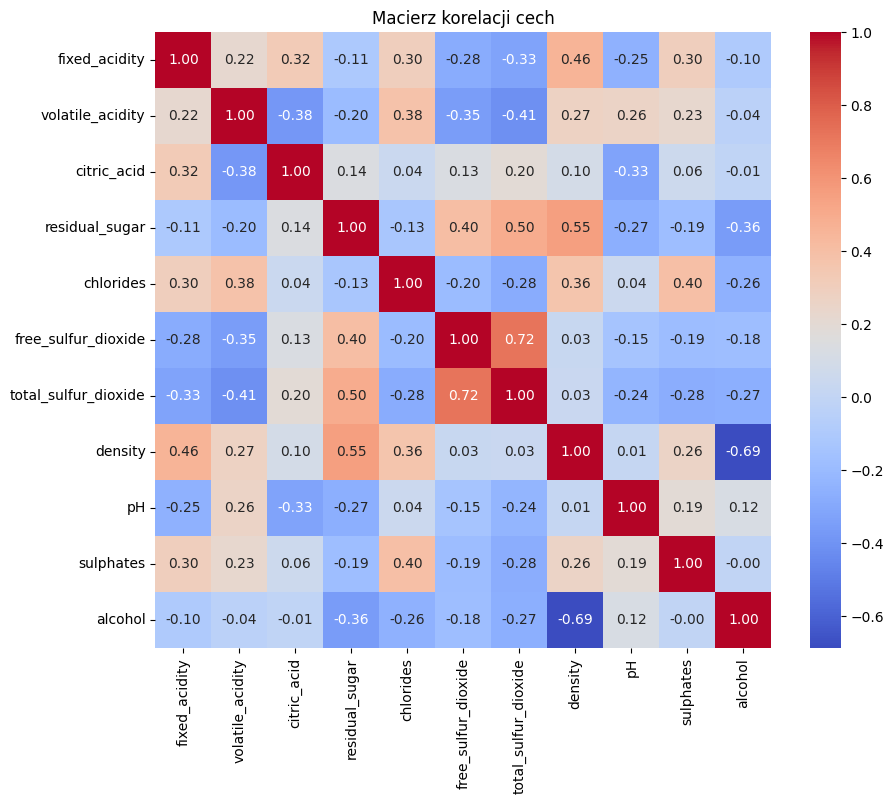

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = pd.DataFrame(X).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech")
plt.show()


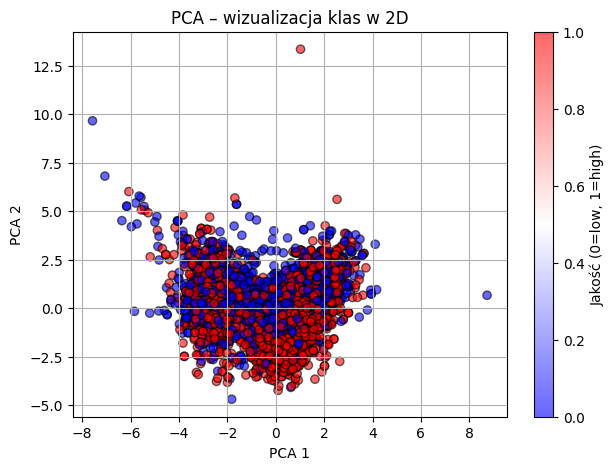

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.6, edgecolors='k')
plt.title('PCA – wizualizacja klas w 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Jakość (0=low, 1=high)')
plt.show()


Jak widac, nasze dwie klasy bardzo na siebie nachodza, informuje nas to, ze klasyfikacja w tym wypadku bedzie trudna

In [20]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history1, name1, history2, name2):
    plt.figure(figsize=(12, 5))

    # Wykres dokładności
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label=f'{name1} - Train')
    plt.plot(history1.history['val_accuracy'], label=f'{name1} - Val')
    plt.plot(history2.history['accuracy'], label=f'{name2} - Train', linestyle='--')
    plt.plot(history2.history['val_accuracy'], label=f'{name2} - Val', linestyle='--')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Wykres straty
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label=f'{name1} - Train')
    plt.plot(history1.history['val_loss'], label=f'{name1} - Val')
    plt.plot(history2.history['loss'], label=f'{name2} - Train', linestyle='--')
    plt.plot(history2.history['val_loss'], label=f'{name2} - Val', linestyle='--')
    plt.title('Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# 1. Uproszczenie modelu

In [24]:
small_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

small_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()


small_history = small_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)



print(f"Czas wykonania: {end - start} sekund")



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6634 - loss: 0.6413 - val_accuracy: 0.7385 - val_loss: 0.5217
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.5043 - val_accuracy: 0.7454 - val_loss: 0.5074
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7408 - loss: 0.5181 - val_accuracy: 0.7431 - val_loss: 0.5034
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7624 - loss: 0.4920 - val_accuracy: 0.7546 - val_loss: 0.4937
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7577 - loss: 0.4892 - val_accuracy: 0.7531 - val_loss: 0.4931
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.4888 - val_accuracy: 0.7508 - val_loss: 0.4910
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7631 - loss: 0.4913 - val_accuracy: 0.7562 - val_loss: 0.4880
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7684 - loss: 0.4911 - val_accuracy: 0.7608

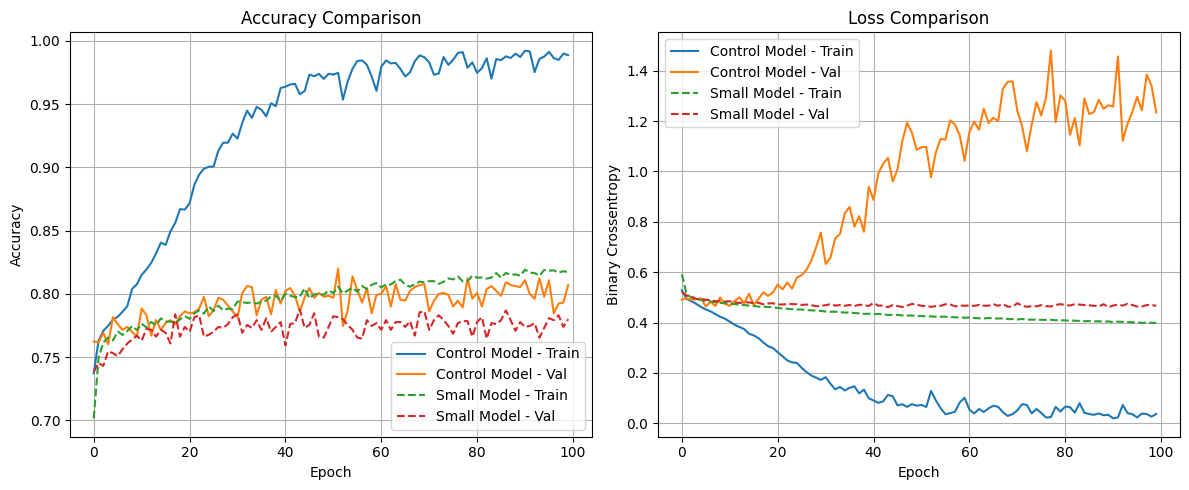

In [25]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', small_history, 'Small Model')

## Ocena
Z powyszego wykresu mozna wnioskowac, ze uproszczenie modelu pomoglo z generalizacja modelu, wykresy strat dla danych testowych i danych walidacyjnych prwaie sie pokrywaja, co jest znacznym plusem

## Uwaga
Z powyzszych wykresow wynika rowniez ze model osiagnal *gorsza* dokladnosc niz poprzedni przeuczony. Jednakze brak przeuczenia jest dobrym krokiem do ulepszania naszego modelu.

# 2. Dropout

In [23]:

from tensorflow.keras.layers import Dropout

dropout_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dropout_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

dropout_history = dropout_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()

print(f"Czas wykonania: {end - start} sekund")

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6641 - loss: 0.5975 - val_accuracy: 0.7423 - val_loss: 0.5043
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7500 - loss: 0.5238 - val_accuracy: 0.7554 - val_loss: 0.4940
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7552 - loss: 0.5259 - val_accuracy: 0.7462 - val_loss: 0.4997
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7611 - loss: 0.4966 - val_accuracy: 0.7562 - val_loss: 0.4876
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7685 - loss: 0.4905 - val_accuracy: 0.7608 - val_loss: 0.4870
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7613 - loss: 0.4976 - val_accuracy: 0.7685 - val_loss: 0.4943
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.7661 - loss: 0.4895 - val_accuracy: 0.7638 - val_loss: 0.4838
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7698 - loss: 0.4855 - va

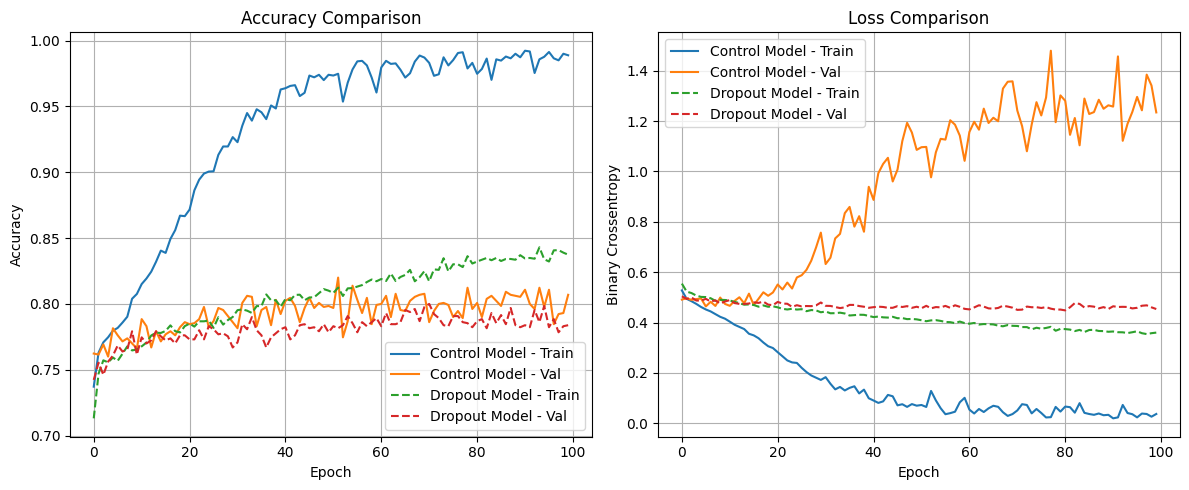

In [26]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', dropout_history, 'Dropout Model')

Zastosowanie metody Dropout, ktora opiera sie na wylaczaniu neuronow podczas treningu bardzo poprawilo nasz model. Skutecznosc na zbiorze walidacyjnym jest bardzo podobna do sieci bez droupoutu, lecz po wykresie straty widzimy znaczną poprawę, dropout bardzo zmniejszył nam przeuczenie, co oznacza że będzie on dobrym parametrem do wprowadzenia w końcowej sieci.

# L2

In [27]:
from tensorflow.keras.regularizers import l2

l2_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

l2_history = l2_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7036 - loss: 0.9969 - val_accuracy: 0.7485 - val_loss: 0.6643
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7529 - loss: 0.6437 - val_accuracy: 0.7615 - val_loss: 0.5741
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7652 - loss: 0.5641 - val_accuracy: 0.7485 - val_loss: 0.5522
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7571 - loss: 0.5497 - val_accuracy: 0.7731 - val_loss: 0.5309
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7623 - loss: 0.5344 - val_accuracy: 0.7577 - val_loss: 0.5354
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7750 - loss: 0.5078 - val_accuracy: 0.7700 - val_loss: 0.5147
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7653 - loss: 0.5128 - val_accuracy: 0.7731 - val_loss: 0.5130
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7794 - loss: 0.4996 - val_accuracy: 0.78

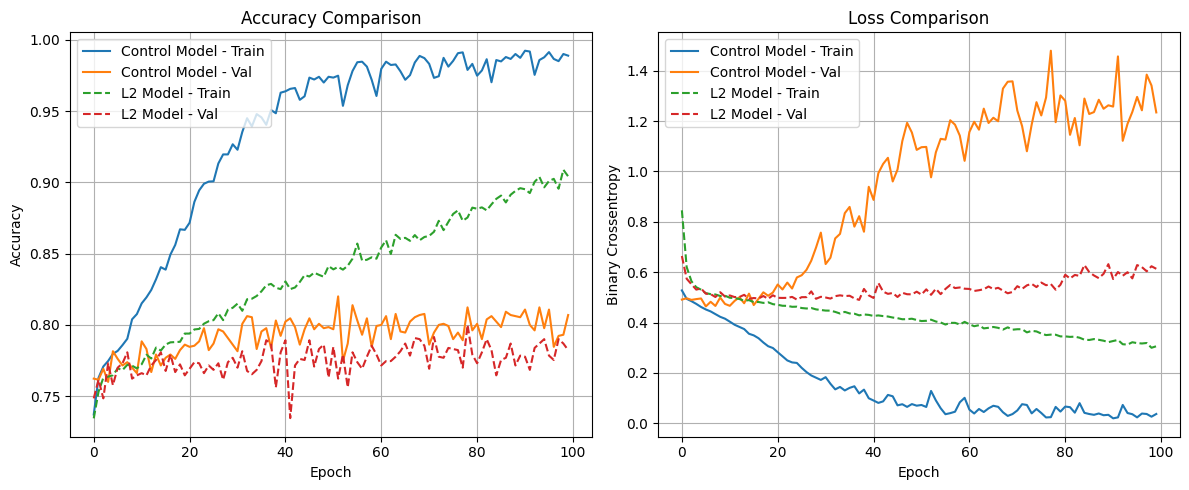

In [28]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', l2_history, 'L2 Model')

# L1

L2 niestety w tym wypadku wypadla slabo...

POTENCJALNIE dzieje sie tak dlatego że l1 jest duzo bardziej brutalna niz l2, czyli l1 jest w stanie wycinac cale cechy ktore uznaje za niewartosciowe, i ktore moga negatywnie wplywac na uczenie sie modelu. l2 nie zeruje wag a zmniejsza je, co tutaj moze prowadzic do niesatysfakcjonujacego wyniku.

In [29]:
from tensorflow.keras.regularizers import l1

l1_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')
])

l1_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
l1_history = l1_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

end = time.time()


Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6987 - loss: 5.3088 - val_accuracy: 0.7146 - val_loss: 0.7901
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7376 - loss: 0.7281 - val_accuracy: 0.7431 - val_loss: 0.6416
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7471 - loss: 0.6405 - val_accuracy: 0.7462 - val_loss: 0.6061
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7674 - loss: 0.5992 - val_accuracy: 0.7400 - val_loss: 0.5982
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7582 - loss: 0.6004 - val_accuracy: 0.7515 - val_loss: 0.5861
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7446 - loss: 0.6025 - val_accuracy: 0.7562 - val_loss: 0.5763
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7642 - loss: 0.5815 - val_accuracy: 0.7515 - val_loss: 0.5783
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7444 - loss: 0.5861 - val_a

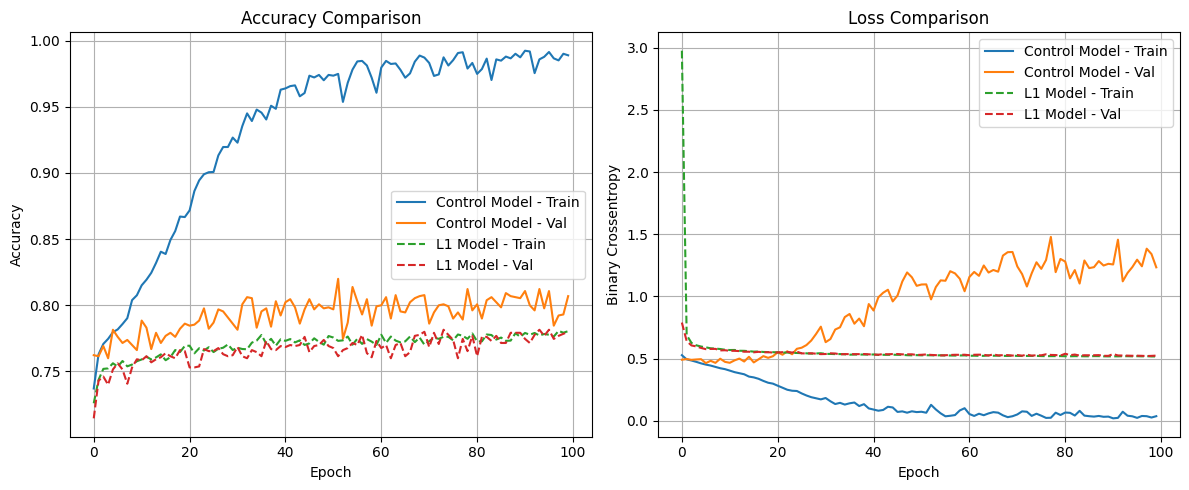

In [30]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', l1_history, 'L1 Model')

# Early stopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stop_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start = time.time()

early_history = early_stop_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end = time.time()

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7310 - loss: 0.5423 - val_accuracy: 0.7454 - val_loss: 0.5044
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7575 - loss: 0.5023 - val_accuracy: 0.7546 - val_loss: 0.4980
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7737 - loss: 0.4832 - val_accuracy: 0.7769 - val_loss: 0.4826
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7844 - loss: 0.4664 - val_accuracy: 0.7585 - val_loss: 0.5042
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7899 - loss: 0.4526 - val_accuracy: 0.7592 - val_loss: 0.4917
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7891 - loss: 0.4470 - val_accuracy: 0.7677 - val_loss: 0.4835
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7958 - loss: 0.4405 - val_accuracy: 0.7662 - val_loss: 0.4858
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8040 - loss: 0.4265 - val_ac

TypeError: plot_accuracy_and_loss() missing 2 required positional arguments: 'history2' and 'name2'

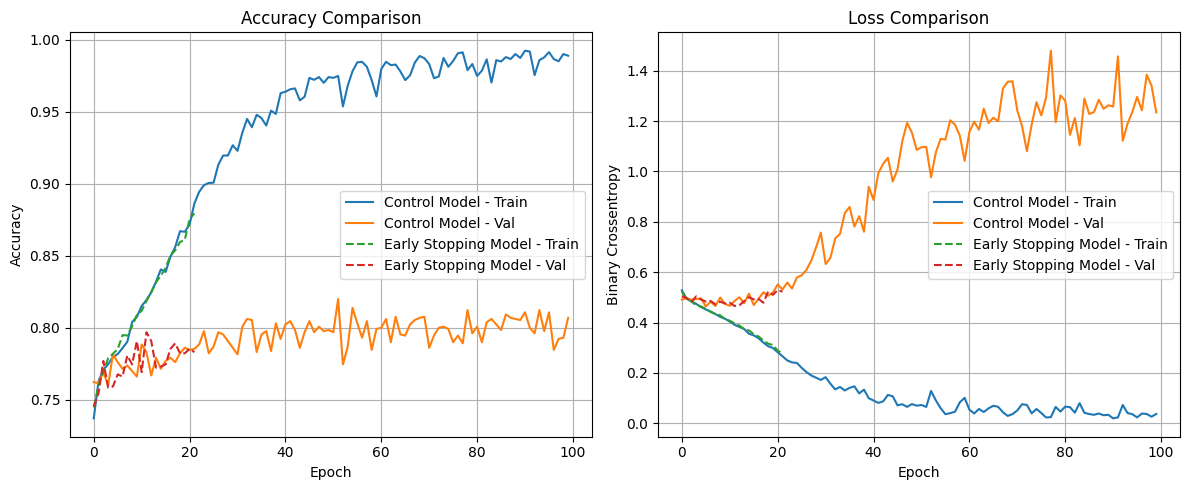

In [32]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', early_history, 'Early Stopping Model')

Niestety sam early stopping to za malo zeby zapobiec przeuczaniu, jest to jednak swietna technika do laczenia z innymi

In [33]:
import time

combined_model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

combined_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
combined_history = combined_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
end = time.time()



Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6743 - loss: 5.4974 - val_accuracy: 0.7262 - val_loss: 1.0394
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7271 - loss: 0.9038 - val_accuracy: 0.7300 - val_loss: 0.6794
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7396 - loss: 0.6782 - val_accuracy: 0.7554 - val_loss: 0.6143
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7179 - loss: 0.6582 - val_accuracy: 0.7515 - val_loss: 0.5995
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7482 - loss: 0.6265 - val_accuracy: 0.7277 - val_loss: 0.6100
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7361 - loss: 0.6068 - val_accuracy: 0.7469 - val_loss: 0.5819
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7485 - loss: 0.6046 - val_accuracy: 0.7508 - val_loss: 0.5803
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7480 - loss: 0.5934 - val_a

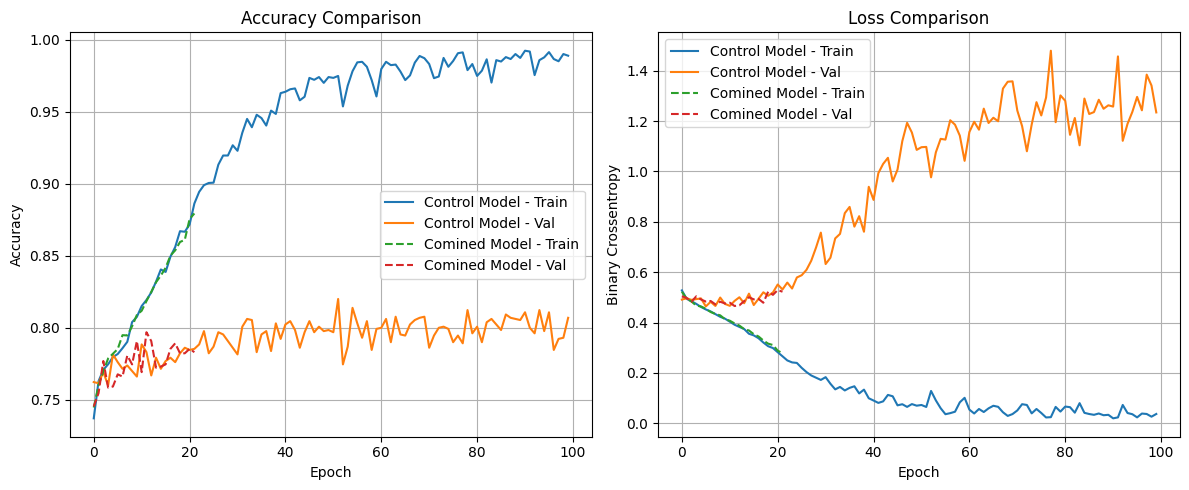

In [34]:
end = time.time()
plot_accuracy_and_loss(history, 'Control Model', early_history, 'Comined Model')

Pomimo że model bez żadnych metod regularizacji osiągnął najwyższy wynik na zbiorze walidacyjnym, jego duża rozbieżność między dokładnością treningową a walidacyjną świadczyła o przeuczeniu.
Metody takie jak Dropout, L1/L2 regularizacja oraz EarlyStopping znacząco ograniczyły overfitting kosztem nieznacznego spadku dokładności.
W praktyce modele regularizowane mogą być bardziej niezawodne przy generalizacji na nowe dane.

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve,
    roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []

for train_index, val_index in skf.split(X_train_scaled, y_train):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

    model_cv = Sequential([
        Dense(512, activation='relu', kernel_regularizer=l1(0.001), input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_cv.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_cv_train, y_cv_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    score = model_cv.evaluate(X_cv_val, y_cv_val, verbose=0)
    cv_accuracies.append(score[1])

print(f"Cross-validation accuracies: {cv_accuracies}")
print(f"Mean CV accuracy: {np.mean(cv_accuracies):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation accuracies: [0.7701923251152039, 0.7461538314819336, 0.7699711322784424, 0.7362849116325378, 0.7430221438407898]
Mean CV accuracy: 0.7531


Z cross validation wynika ze model generalizuje calkiem niezle, nie ma duzego rozrzutu pomiedzy danymi.

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


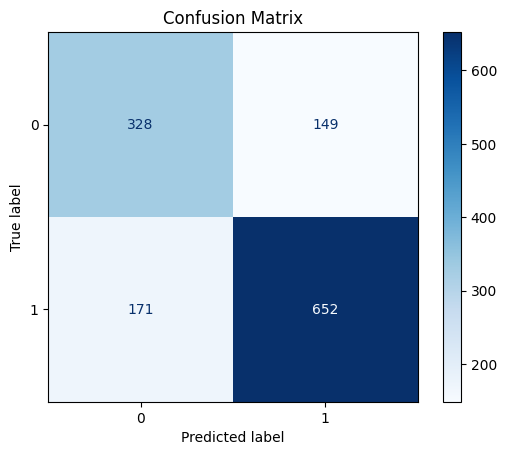

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       477
           1       0.81      0.79      0.80       823

    accuracy                           0.75      1300
   macro avg       0.74      0.74      0.74      1300
weighted avg       0.76      0.75      0.75      1300



In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = combined_model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Model osiągnął 75% skuteczności, jednak analiza metryk klasyfikacyjnych pokazuje, że lepiej radzi sobie z klasą oznaczającą wyższą jakość wina. Klasa o niższej jakości (0) charakteryzuje się niższą precyzją i recall, co oznacza, że model ma tendencję do ich mylenia z klasą 1. Może to wynikać z niewyraźnej separacji klas oraz większej liczby przykładów klasy 1.

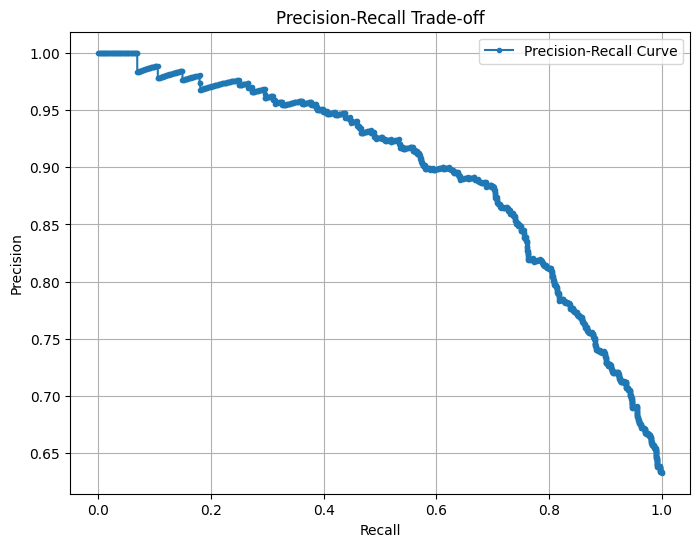

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True)
plt.legend()
plt.show()


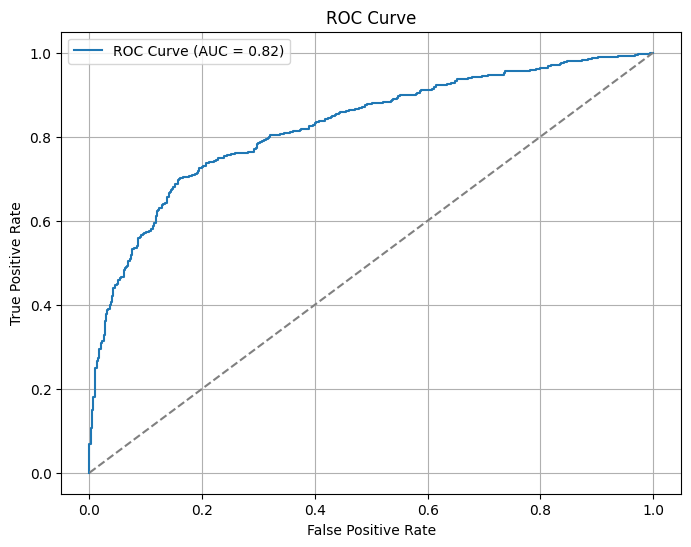

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
